# Methods for Portfolio Optimization

In [109]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import linprog
from tabulate import tabulate

### Function

In [110]:
# Function to calculate the return of a portfolio
def portfolio_return(weights, mean_returns):
    return np.dot(weights.T, mean_returns)

# Calculate the mean return of a portfolio given the asset weights and mean returns.
def checkMeanRet(weights, ret_mean):
    return np.dot(ret_mean.T, weights)

# Function to calculate the risk (variance) of a portfolio
def portfolio_risk(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Function to minimize risk given a target return level
def minimize_risk(weights, mean_returns, cov_matrix, target_return):
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x, mean_returns) - target_return},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(len(mean_returns)))
    result = minimize(portfolio_risk, len(mean_returns) * [1. / len(mean_returns)], args=(cov_matrix,), 
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Calculate the annual return from the weekly mean return.
def annualize_return(weekly_return):
    return (1 + weekly_return) ** 52 - 1

## Dataset
https://www.francescocesarone.com/data-sets


### Ftse100

FTSE100 FOLDER

The folder contains the weekly linear returns for the Ftse100 from 01-22-2007 to 05-06-2013.
These returns are available into two extensions (.txt & .mat).

The files 'IndRet_Ftse100' contain a column vector which is the weekly linear returns of the market index values.

The files 'RR_Ftse100' contain a matrix where each column is the weekly linear returns of each asset.

NOTE: The returns are calculated from the weekly prices adjusted for dividends downloaded from yahoo.finance.com. 
Stocks with more than two consecutive missing values were disregarded, while the individual missing values were 
interpolated. 

In [131]:
PORTFOLIO = 'Ftse100'

mat_file_1 = 'Ftse100/IndRet_Ftse100.mat'
mat_file_2 = 'Ftse100/RR_Ftse100.mat'

mat_data_1 = scipy.io.loadmat(mat_file_1)
mat_data_2 = scipy.io.loadmat(mat_file_2)

array_ret = mat_data_1['Ret_ftse100'].flatten()
matrix_ret = mat_data_1['Ret_ftse100']
matrix_rr = mat_data_2['RR']

mean_returns = np.mean(matrix_rr, axis=0)
cov_matrix = np.cov(matrix_rr, rowvar=False)

nStocks = len(matrix_rr.T)
print(f"N. Stock: {nStocks}")

N. Stock: 63


### Stoxx50

EUROSTOXX50 FOLDER

The folder contains the weekly linear returns for the Eurostoxx50 from 01-22-2007 to 05-06-2013.
These returns are available into two extensions (.txt & .mat).

The files 'IndRet_Stoxx50' contain a column vector which is the weekly linear returns of the market index values.

The files 'RR_Stoxx50' contain a matrix where each column is the weekly linear returns of each asset.

NOTE: The returns are calculated from the weekly prices adjusted for dividends downloaded from yahoo.finance.com. 
Stocks with more than two consecutive missing values were disregarded, while the individual missing values were 
interpolated. 

In [112]:
PORTFOLIO = 'EuroStoxx50'

mat_file_1 = 'EuroStoxx50/IndRet_Stoxx50.mat'
mat_file_2 = 'EuroStoxx50/RR_Stoxx50.mat'

mat_data_1 = scipy.io.loadmat(mat_file_1)
mat_data_2 = scipy.io.loadmat(mat_file_2)

array_ret = mat_data_1['Ret_stoxx50'].flatten()
matrix_ret = mat_data_1['Ret_stoxx50']
matrix_rr = mat_data_2['RR']

mean_returns = np.mean(matrix_rr, axis=0)
cov_matrix = np.cov(matrix_rr, rowvar=False)

nStocks = len(matrix_rr.T)
print(f"N. Stock: {nStocks}")

N. Stock: 32


### FTSE Mib

The folder contains the weekly linear returns for the FtseMib from 01-22-2007 to 05-06-2013.
These returns are available into two extensions (.txt & .mat).

The files 'IndRet_FtseMib' contain a column vector which is the weekly linear returns of the market index values.

The files 'RR_FtseMib' contain a matrix where each column is the weekly linear returns of each asset.

NOTE: The returns are calculated from the weekly prices adjusted for dividends downloaded from yahoo.finance.com. 
Stocks with more than two consecutive missing values were disregarded, while the individual missing values were 
interpolated. 

In [113]:
PORTFOLIO = 'FSTE Mib'

mat_file_1 = 'FtseMib/IndRet_FtseMib.mat'
mat_file_2 = 'FtseMib/RR_FtseMib.mat'

mat_data_1 = scipy.io.loadmat(mat_file_1)
mat_data_2 = scipy.io.loadmat(mat_file_2)

array_ret = mat_data_1['Ret_ftsemib'].flatten()
matrix_ret = mat_data_1['Ret_ftsemib']
matrix_rr = mat_data_2['RR']

mean_returns = np.mean(matrix_rr, axis=0)
cov_matrix = np.cov(matrix_rr, rowvar=False)

nStocks = len(matrix_rr.T)
print(f"N. Stock: {nStocks}")

N. Stock: 34


## Analytics

Index Name: Ftse100
N. Stock: 63


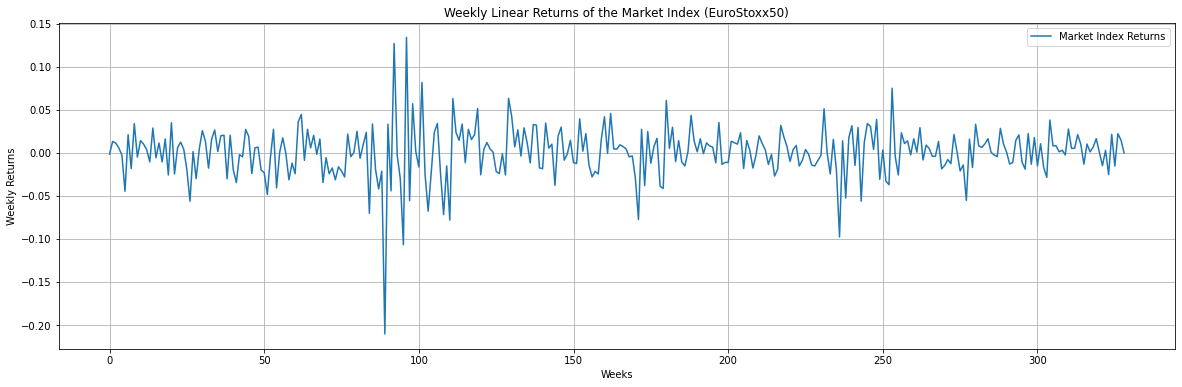

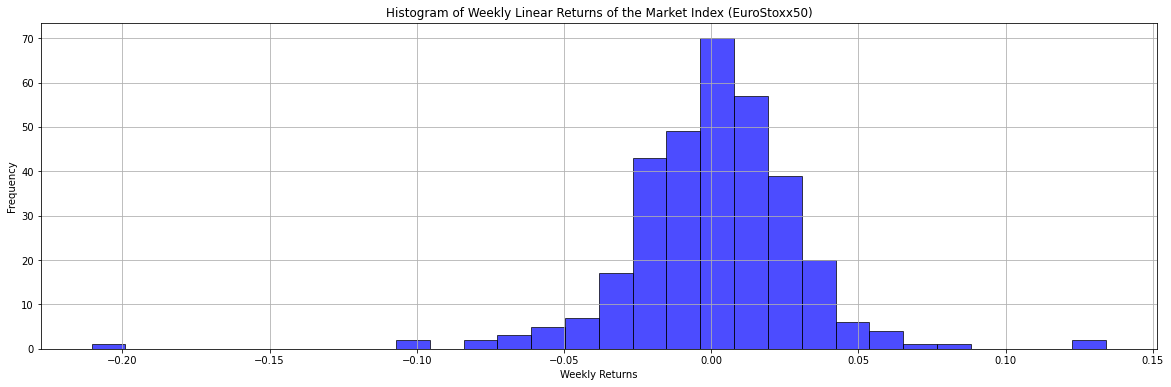

In [132]:
print(f"Index Name: {PORTFOLIO}")
print(f"N. Stock: {nStocks}")

plt.figure(figsize=(20, 6))
plt.plot(array_ret, label='Market Index Returns')
plt.xlabel('Weeks')
plt.ylabel('Weekly Returns')
plt.title('Weekly Linear Returns of the Market Index (EuroStoxx50)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 6))
plt.hist(array_ret, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Weekly Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Weekly Linear Returns of the Market Index (EuroStoxx50)')
plt.grid(True)
plt.show()

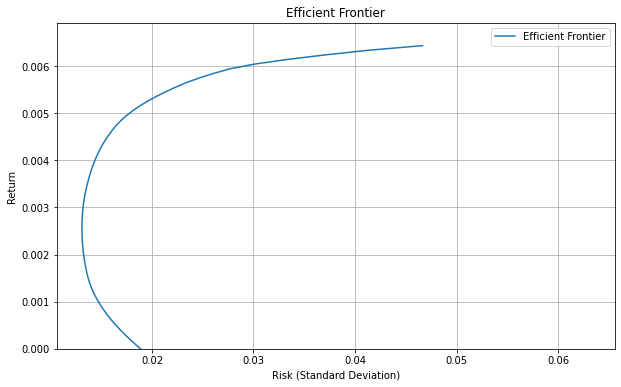

In [133]:
# Calculate the efficient frontier
target_returns = np.linspace(min(mean_returns), max(mean_returns), 100)
efficient_portfolios = []

for target_return in target_returns:
    efficient_portfolios.append(minimize_risk(len(mean_returns) * [1. / len(mean_returns)], mean_returns, cov_matrix, target_return))

# Extract the risks and returns of the efficient portfolios
risks = [portfolio_risk(x['x'], cov_matrix) for x in efficient_portfolios]
returns = [portfolio_return(x['x'], mean_returns) for x in efficient_portfolios]

plt.figure(figsize=(10, 6))
plt.plot(risks, returns, label='Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.ylim(0) 
plt.legend()
plt.grid(True)
plt.show()

In [134]:
# Plotting Function
def plot_results(loss_values, returns_iteration, optimal_weights, label):
    plt.figure(figsize=(20, 5))

    # Loss Function Values
    plt.subplot(1, 2, 1)
    plt.plot(loss_values)
    plt.title('Objective Function Value')
    plt.xlabel('Iteration')
    plt.ylabel('Value')

    # Returns Values
    plt.subplot(1, 2, 2)
    plt.plot(returns_iteration, label=label)
    plt.title('Return over Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Return Mean')
    plt.legend()

    ret_mean = checkMeanRet(optimal_weights, mean_returns) * 100
    risk = portfolio_risk(optimal_weights, cov_matrix)

    print('\n' + PORTFOLIO)
    print(f"Max Weights: {np.max(optimal_weights)}")
    print("Sum of weights:", np.sum(optimal_weights))
    print('Weekly Return Portfolio: ', np.round(ret_mean, 5), "%")
    print('Yearly Return Portfolio: ', annualize_return(ret_mean), "%")
    print("Risk: ", np.round(risk,3), "%")

    # Weights histogram
    plt.figure(figsize=(15, 5))
    plt.bar(range(len(optimal_weights)), optimal_weights, color='skyblue')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Histogram of weights')
    plt.xticks(range(len(optimal_weights)), labels=[f'Element {i+1}' for i in range(len(optimal_weights))])
    plt.grid(axis='y')

    plt.tight_layout()
    plt.show()

## Portfolio Optimizations

We have $n$ avaiable assets. We call $w_i$ the quantity of money invested on the
$i$-th asset during the considered period and with $r_i$ the returns on the $i$-th
asset. We have two different constraints. The first one is non-negativity for the
variables (i.e., $w_i$ ≥ 0). It basically means that short selling (selling asset that
we still don’t own) is not allowed. We then have the budget constraint:

$
\begin{equation}
\sum_{i=1}^{n} w_i = B
\end{equation}
$

the total amount of money invested needs to be equal to the budget $B$ ($B$ can be simply set to 1).
Consider a stochastic model for the returns: $r ∈ R^n$ is a randomly generated vector with mean $\overline{r}$ and covariance $\Sigma$. Thus expected return will be:
$
\begin{equation}
\overline{r}^\intercal \, w
\end{equation}
$
and variance (risk)
$
\begin{equation}
w^\intercal \, \Sigma \, w
\end{equation}
$
Classic portfolio problem, described by Markowitz (1952), is a convex quadratic programming problem:
$
\begin{equation}
\begin{split}
\underset{w∈R^n}{min} \quad \gamma \, w^\intercal \, \Sigma \, w - \overline{r}^\intercal \, w \\
s.t. \quad e^\intercal w = 1 \\
w > 0
\end{split}
\end{equation} 
$
with $\gamma$ > 0 risk-aversion parameter. Goal is thus finding the set of assets that
minimizes the variance (risk connected to the given portfolio) while maximizing
the expected return (we obviously need to satisfy budget and non-negativity
constraints).

In [135]:
def loss(weights, ret_mean, cov, RISK_AVERSION):
    return  np.dot(RISK_AVERSION, np.dot(weights.T, np.dot(cov, weights))) -  np.dot(ret_mean.T, weights)

### Gradient

$
\begin{equation}
\nabla f(w_k) = 2 \, \gamma \, \Sigma \, w - \overline{r}^\intercal\\
\end{equation} 
$

In [136]:
def gradient(weights, ret_mean, cov, RISK_AVERSION):
    return  RISK_AVERSION * 2 * np.dot(weights, cov) -  ret_mean.T

## Frank-Wolfe and Pairwise Frank-Wolfe over the Markowitz portfolio problems

In [137]:
RISK_AVERSION = 3

In [138]:
# Linear Minimization Oracle (LMO)
def linearMinimizationOracle(grad):
    s = np.zeros_like(grad)
    s[np.argmin(grad)] = 1  # Set the position with the smallest gradient to 1
    return s

# Perform a line search to find the optimal step size (gamma) that minimizes the loss function.
def line_search(weights, direction, ret_mean, cov_matrix, RISK_AVERSION):
    gamma_range = np.linspace(0, 1, 100)
    losses = [loss((1 - gamma) * weights + gamma * direction, ret_mean, cov_matrix, RISK_AVERSION) for gamma in gamma_range]
    optimal_gamma = gamma_range[np.argmin(losses)]
    return optimal_gamma

# Compute the duality gap for the given weights and gradient.
def duality_gap(weights, grad):
    s = linearMinimizationOracle(grad)
    return np.dot(grad, weights - s)

### Frank-Wolfe

00% - ret 00.23% - loss -0.003224
05% - ret 00.57% - loss -0.003527
10% - ret 00.57% - loss -0.003940
15% - ret 00.53% - loss -0.004021
20% - ret 00.55% - loss -0.004053
25% - ret 00.55% - loss -0.004103
30% - ret 00.53% - loss -0.004104
35% - ret 00.53% - loss -0.004105
40% - ret 00.53% - loss -0.004105
45% - ret 00.53% - loss -0.004106
50% - ret 00.53% - loss -0.004106
55% - ret 00.53% - loss -0.004106
60% - ret 00.53% - loss -0.004106
65% - ret 00.53% - loss -0.004106
70% - ret 00.53% - loss -0.004106
75% - ret 00.53% - loss -0.004106
80% - ret 00.53% - loss -0.004106
85% - ret 00.53% - loss -0.004106
90% - ret 00.53% - loss -0.004106
95% - ret 00.53% - loss -0.004106

Ftse100
Max Weights: 0.3263153660595517
Sum of weights: 1.0
Weekly Return Portfolio:  0.52921 %
Yearly Return Portfolio:  3911320297.081405 %
Risk:  0.02 %


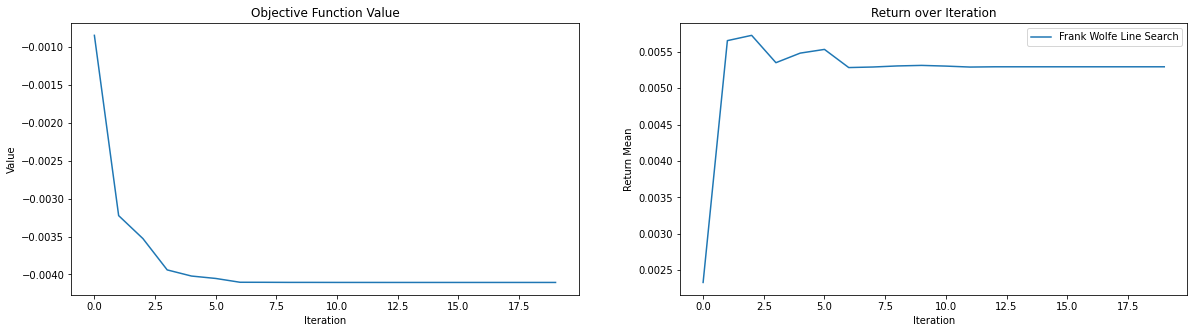

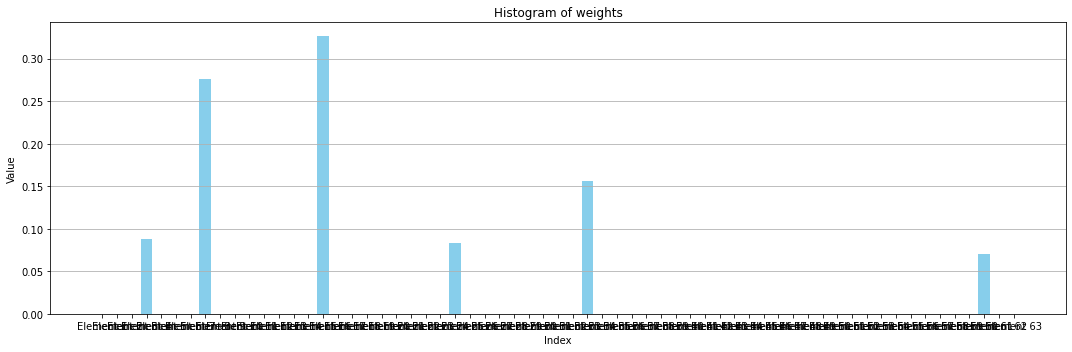

CPU times: user 1.36 s, sys: 76.5 ms, total: 1.44 s
Wall time: 941 ms


In [139]:
%%time

ITERATIONS = 20

loss_values_ls = []
returns_iteration_ls = []

weights = np.ones(nStocks) / nStocks

for itr in range(ITERATIONS):
    if itr % (ITERATIONS * 0.05) == 0:
        print(f"{int(itr/ITERATIONS*100):02}%", end="")

    grad = gradient(weights, mean_returns, cov_matrix, RISK_AVERSION)
    s = linearMinimizationOracle(grad)

    # Store values for plotting
    loss_values_ls.append(loss(weights, mean_returns, cov_matrix, RISK_AVERSION))
    returns_iteration_ls.append(checkMeanRet(weights, mean_returns))
    
    gamma = line_search(weights, s, mean_returns, cov_matrix, RISK_AVERSION)
    weights = (1 - gamma) * weights + gamma * s
    
    weights = np.clip(weights, 0, 1)
    weights /= np.sum(weights)
    
    if np.linalg.norm(grad) < 1e-6:
        break

    if itr % (ITERATIONS * 0.05) == 0:
        print(f" - ret {(returns_iteration_ls[-1])*100:05.2f}% - loss {loss(weights, mean_returns, cov_matrix, RISK_AVERSION):05.6f}")

optimal_weights_ls = weights

plot_results(loss_values_ls, returns_iteration_ls, optimal_weights_ls, 'Frank Wolfe Line Search')

### PairWise Frank Wolfe

00% - ret 00.23% - loss -0.001959
05% - ret 00.33% - loss -0.002550
10% - ret 00.37% - loss -0.002796
15% - ret 00.42% - loss -0.003130
20% - ret 00.45% - loss -0.003338
25% - ret 00.44% - loss -0.003343
30% - ret 00.48% - loss -0.003554
35% - ret 00.48% - loss -0.003711
40% - ret 00.50% - loss -0.003689
45% - ret 00.53% - loss -0.003799
50% - ret 00.50% - loss -0.003879
55% - ret 00.50% - loss -0.003953
60% - ret 00.51% - loss -0.003913
65% - ret 00.53% - loss -0.003967
70% - ret 00.52% - loss -0.004008
75% - ret 00.53% - loss -0.003885
80% - ret 00.54% - loss -0.003963
85% - ret 00.52% - loss -0.004007
90% - ret 00.53% - loss -0.003920
95% - ret 00.55% - loss -0.004024

Ftse100
Max Weights: 0.294832739516535
Sum of weights: 1.0000000000000007
Weekly Return Portfolio:  0.53618 %
Yearly Return Portfolio:  4955200214.246354 %
Risk:  0.021 %


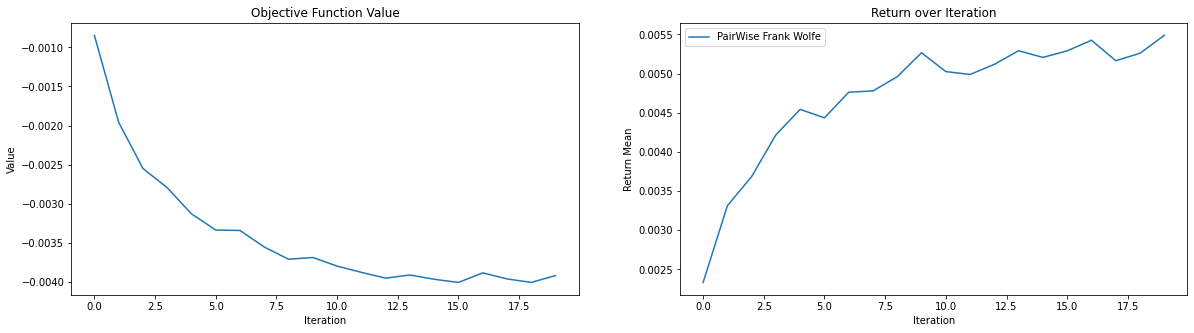

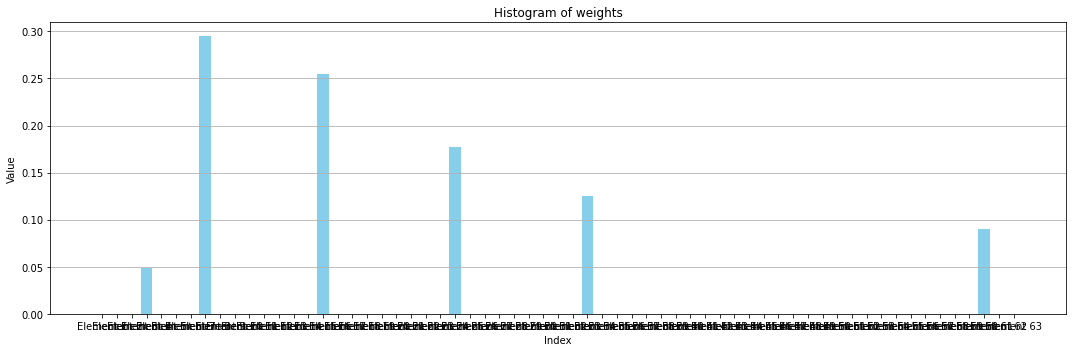

CPU times: user 1.29 s, sys: 75.8 ms, total: 1.36 s
Wall time: 812 ms


In [140]:
%%time

ITERATIONS = 20

loss_values_pw = []
returns_iteration_pw = []

weights = np.ones(nStocks) / nStocks

for itr in range(ITERATIONS):
    if itr % (ITERATIONS * 0.05) == 0:
        print(f"{int(itr/ITERATIONS*100):02}%", end="")

    grad = gradient(weights, mean_returns, cov_matrix, RISK_AVERSION)
    
    i = np.argmin(grad)
    j = np.argmax(grad)

    # Store values for plotting
    loss_values_pw.append(loss(weights, mean_returns, cov_matrix, RISK_AVERSION))
    returns_iteration_pw.append(checkMeanRet(weights, mean_returns))
    
    direction = np.zeros_like(weights)
    direction[i] = 1
    direction[j] = -1

    gamma = line_search(weights, direction, mean_returns, cov_matrix, RISK_AVERSION)

    weights += gamma * direction

    weights = np.clip(weights, 0, 1)
    weights /= np.sum(weights)
    
    if np.linalg.norm(grad) < 1e-6:
        break

    if itr % (ITERATIONS * 0.05) == 0:
        print(f" - ret {(returns_iteration_pw[-1])*100:05.2f}% - loss {loss(weights, mean_returns, cov_matrix, RISK_AVERSION):05.6f}")

optimal_weights_pw = weights

plot_results(loss_values_pw, returns_iteration_pw, optimal_weights_pw, 'PairWise Frank Wolfe')

### Away Step Frank Wolfe

00% - ret 00.23% - loss -0.002654
05% - ret 00.42% - loss -0.002906
10% - ret 00.43% - loss -0.002957
15% - ret 00.43% - loss -0.002974
20% - ret 00.44% - loss -0.003738
25% - ret 00.55% - loss -0.003738
30% - ret 00.55% - loss -0.003738
35% - ret 00.55% - loss -0.003738
40% - ret 00.55% - loss -0.003738
45% - ret 00.55% - loss -0.003738
50% - ret 00.55% - loss -0.003738
55% - ret 00.55% - loss -0.003738
60% - ret 00.55% - loss -0.003738
65% - ret 00.55% - loss -0.003738
70% - ret 00.55% - loss -0.003738
75% - ret 00.55% - loss -0.003738
80% - ret 00.55% - loss -0.003738
85% - ret 00.55% - loss -0.003738
90% - ret 00.55% - loss -0.003738
95% - ret 00.55% - loss -0.003738

Ftse100
Max Weights: 0.7530817956208892
Sum of weights: 1.0
Weekly Return Portfolio:  0.55261 %
Yearly Return Portfolio:  8615910040.46098 %
Risk:  0.024 %


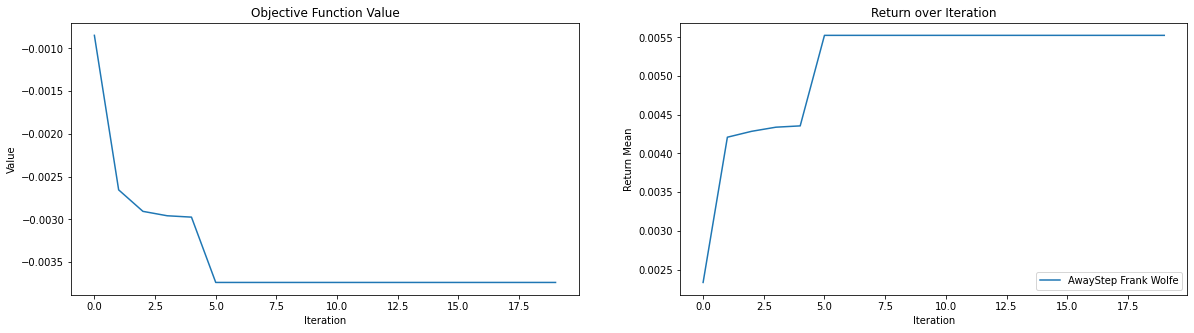

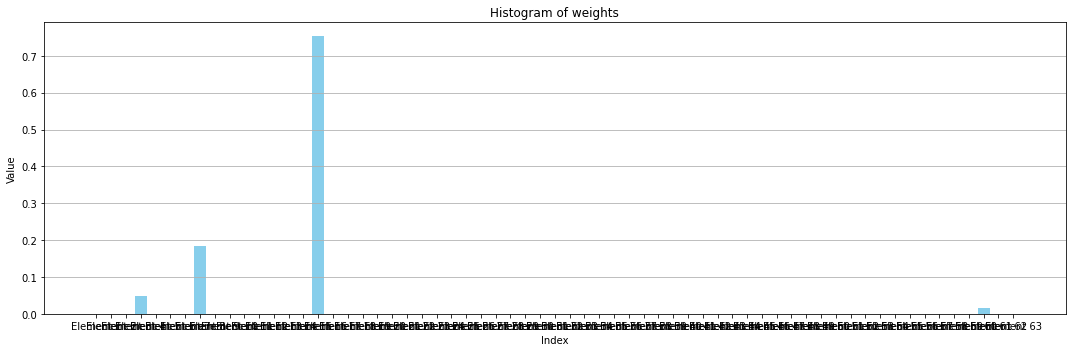

CPU times: user 1.27 s, sys: 61.8 ms, total: 1.33 s
Wall time: 771 ms


In [141]:
%%time

ITERATIONS = 20

loss_values_aw = []
returns_iteration_aw = []

weights = np.ones(nStocks) / nStocks
V = [weights.copy()]

for itr in range(ITERATIONS):
    if itr % (ITERATIONS * 0.05) == 0:
        print(f"{int(itr/ITERATIONS*100):02}%", end="")

    grad = gradient(weights, mean_returns, cov_matrix, RISK_AVERSION)

    # Frank-Wolfe direction
    s = linearMinimizationOracle(grad)
    d_fw = s - weights
    
    # Away direction
    j = np.argmax(np.dot(np.array(V), grad))
    v_j = V[j]
    d_away = weights - v_j
    
    # Determine the optimal direction and step size
    if np.dot(grad, d_fw) < np.dot(grad, d_away):
        direction = d_fw
        step_size = 1.0  # Frank-Wolfe step
    else:
        direction = -d_away
        max_step_size = np.min(weights[weights > 0] / (weights[weights > 0] - v_j[weights > 0]))
        step_size = min(1.0, max_step_size)  # Away step

    # Store values for plotting
    loss_values_aw.append(loss(weights, mean_returns, cov_matrix, RISK_AVERSION))
    returns_iteration_aw.append(checkMeanRet(weights, mean_returns))

    gamma = line_search(weights, direction, mean_returns, cov_matrix, RISK_AVERSION)
    gamma = min(gamma, step_size)

    weights += gamma * direction
    weights = np.clip(weights, 0, 1)
    weights /= np.sum(weights)
    
    # Add new vertex
    if np.array_equal(direction, d_fw):
        V.append(s.copy())
    else:
        if step_size == max_step_size and len(V) > 1:
            V.pop(j)  # Remove vertex

    if np.linalg.norm(grad) < 1e-6:
        break

    if itr % (ITERATIONS * 0.05) == 0:
        print(f" - ret {(returns_iteration_aw[-1])*100:05.2f}% - loss {loss(weights, mean_returns, cov_matrix, RISK_AVERSION):05.6f}")
            
optimal_weights_aw = weights

plot_results(loss_values_aw, returns_iteration_aw, optimal_weights_aw, 'AwayStep Frank Wolfe')

### Scipy Minimize Function - For comparison purposes only


Optimization with scipy.optimize.minimize
Expected Return: 0.5200659971980113%
Sum of weights: 1.0000000000000002
Risk:  0.019 %


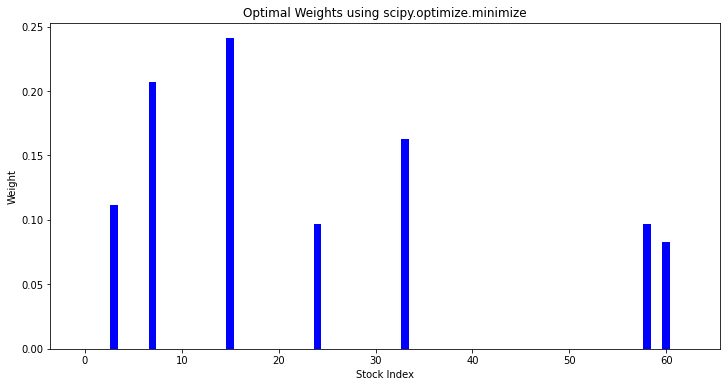

In [142]:
# Constraint: the sum of the weights must be 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Constraints: weights must be between 0 and 1
bounds = [(0, 1) for _ in range(nStocks)]

initial_weights = np.ones(nStocks) / nStocks

result = minimize(loss, initial_weights, args=(mean_returns, cov_matrix, RISK_AVERSION), method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights_scipy = result.x

print('\nOptimization with scipy.optimize.minimize')
print(f"Expected Return: {checkMeanRet(optimal_weights_scipy, mean_returns)*100}%")
print(f"Sum of weights: {np.sum(optimal_weights_scipy)}")

risk = portfolio_risk(optimal_weights_scipy, cov_matrix)
print("Risk: ", np.round(risk,3), "%")

# Plot dell'istogramma dei pesi ottimali
plt.figure(figsize=(12, 6))
plt.bar(range(nStocks), optimal_weights_scipy, color='blue')
plt.xlabel('Stock Index')
plt.ylabel('Weight')
plt.title('Optimal Weights using scipy.optimize.minimize')
plt.show()

## Results Comparison

### Loss Comparison

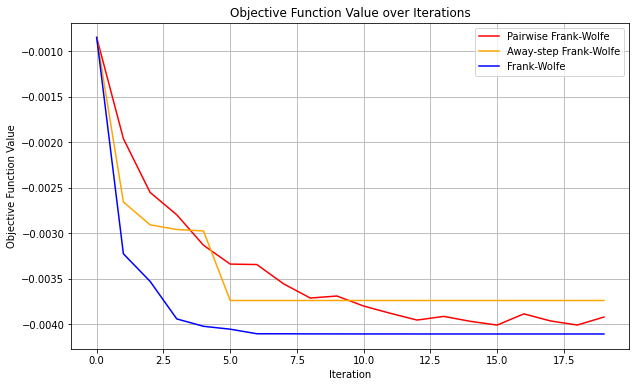

In [143]:
plt.figure(figsize=(10, 6))
plt.plot(loss_values_pw, label='Pairwise Frank-Wolfe', color='red')
plt.plot(loss_values_aw, label='Away-step Frank-Wolfe', color='orange')
plt.plot(loss_values_ls, label='Frank-Wolfe', color='blue')

plt.title('Objective Function Value over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()
plt.grid(True)
plt.show()

### Efficent Frontier Comparison

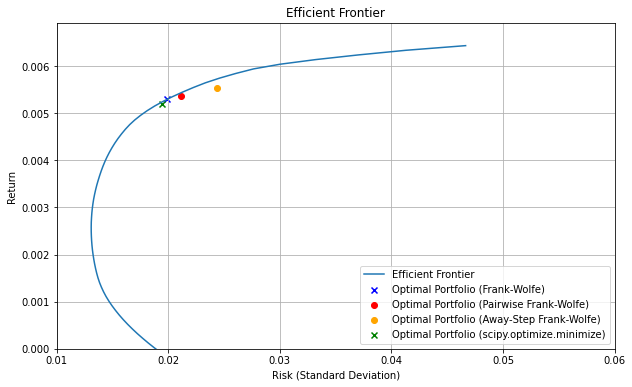

In [144]:
optimal_risk_scipy = portfolio_risk(optimal_weights_scipy, cov_matrix)
optimal_return_scipy = portfolio_return(optimal_weights_scipy, mean_returns)

optimal_risk_linesearch = portfolio_risk(optimal_weights_ls, cov_matrix)
optimal_return_linesearch = portfolio_return(optimal_weights_ls, mean_returns)

optimal_risk_pw = portfolio_risk(optimal_weights_pw, cov_matrix)
optimal_return_pw = portfolio_return(optimal_weights_pw, mean_returns)

optimal_risk_aw = portfolio_risk(optimal_weights_aw, cov_matrix)
optimal_return_aw = portfolio_return(optimal_weights_aw, mean_returns)

# Generate the efficient frontier
target_returns = np.linspace(min(mean_returns), max(mean_returns), 100)
efficient_portfolios = []

for target_return in target_returns:
    efficient_portfolios.append(minimize_risk(len(mean_returns) * [1. / len(mean_returns)], mean_returns, cov_matrix, target_return))

# Extract the risks and returns of the efficient portfolios
risks = [portfolio_risk(x['x'], cov_matrix) for x in efficient_portfolios]
returns = [portfolio_return(x['x'], mean_returns) for x in efficient_portfolios]

plt.figure(figsize=(10, 6))
plt.plot(risks, returns, label='Efficient Frontier')
plt.scatter(optimal_risk_linesearch, optimal_return_linesearch, color='blue', label='Optimal Portfolio (Frank-Wolfe)', marker='x')
plt.scatter(optimal_risk_pw, optimal_return_pw, color='red', label='Optimal Portfolio (Pairwise Frank-Wolfe)', marker='o')
plt.scatter(optimal_risk_aw, optimal_return_aw, color='orange', label='Optimal Portfolio (Away-Step Frank-Wolfe)', marker='o')
plt.scatter(optimal_risk_scipy, optimal_return_scipy, color='green', label='Optimal Portfolio (scipy.optimize.minimize)', marker='x')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.ylim(0) 
plt.xlim(0.01,0.06) 
plt.legend()
plt.grid(True)
plt.show()

### Risk and Return Comparison

In [145]:
annual_return_scipy = annualize_return(optimal_return_scipy)
annual_return_linesearch = annualize_return(optimal_return_linesearch)
annual_return_pw = annualize_return(optimal_return_pw)
annual_return_aw = annualize_return(optimal_return_aw)

data = {
    'Method': ['SciPy Optimization', 'Frank-Wolfe', 'Pairwise Frank-Wolfe', 'Away-step Frank-Wolfe'],
    'Optimal Risk (%)': [round(optimal_risk_scipy * 100, 2), round(optimal_risk_linesearch * 100, 2), round(optimal_risk_pw * 100, 2), round(optimal_risk_aw * 100, 2)],
    'Weekly Return (%)': [round(optimal_return_scipy * 100, 2), round(optimal_return_linesearch * 100, 2), round(optimal_return_pw * 100, 2), round(optimal_return_aw * 100, 2)],
    'Annual Return (%)': [round(annual_return_scipy * 100, 2), round(annual_return_linesearch * 100, 2), round(annual_return_pw * 100, 2), round(annual_return_aw * 100, 2)]
}

results_df = pd.DataFrame(data)
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+---+-----------------------+------------------+-------------------+-------------------+
|   |        Method         | Optimal Risk (%) | Weekly Return (%) | Annual Return (%) |
+---+-----------------------+------------------+-------------------+-------------------+
| 0 |  SciPy Optimization   |       1.95       |       0.52        |       30.96       |
| 1 |      Frank-Wolfe      |       1.99       |       0.53        |       31.58       |
| 2 | Pairwise Frank-Wolfe  |       2.11       |       0.54        |       32.06       |
| 3 | Away-step Frank-Wolfe |       2.44       |       0.55        |       33.18       |
+---+-----------------------+------------------+-------------------+-------------------+


### Investment Simulation

Index: Ftse100
Risk Aversion: 3


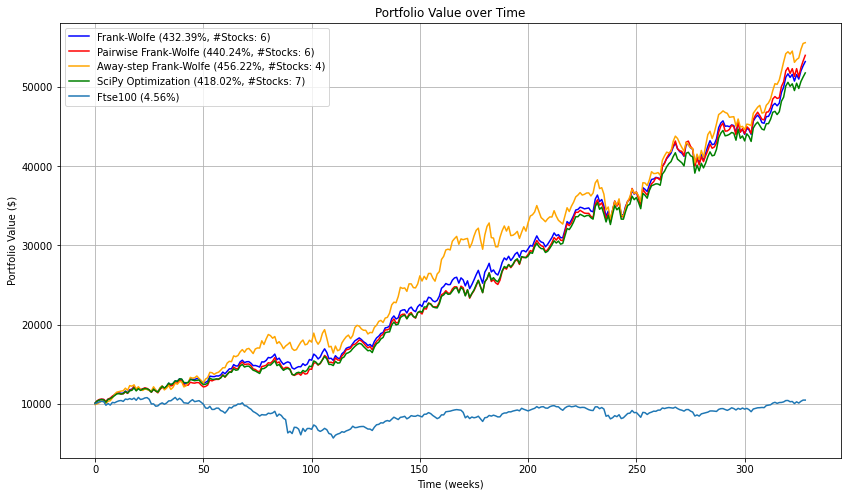

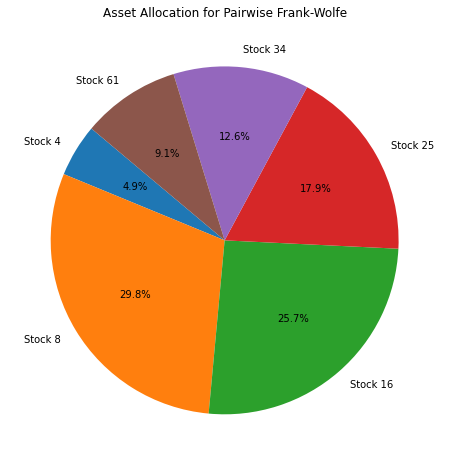

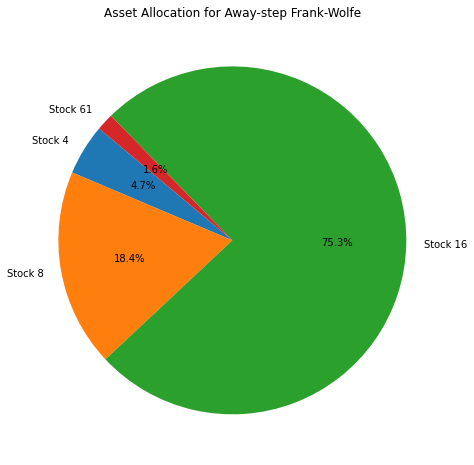

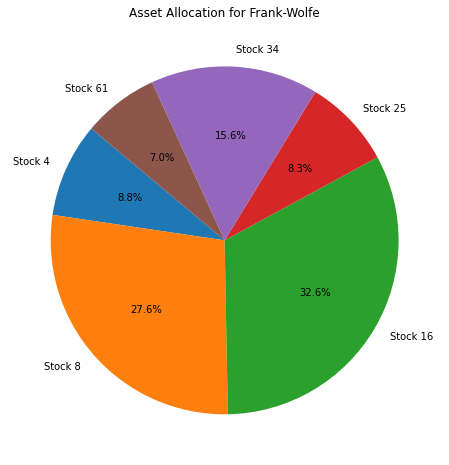

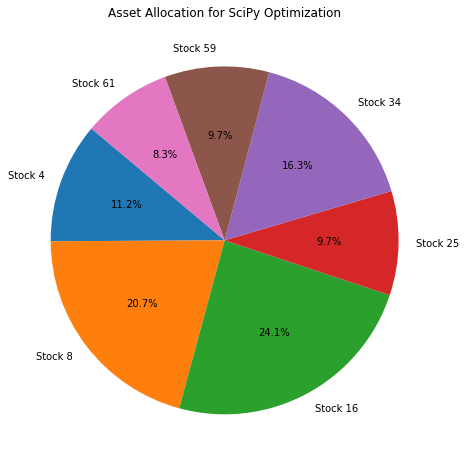

In [146]:
print(f"Index: {PORTFOLIO}")
print(f"Risk Aversion: {RISK_AVERSION}")

initial_investment = 10000

# Function to create a pie chart
def plot_pie_chart(weights, method_name):
    positive_weights = weights[weights > 0.0009]
    labels = [f'Stock {i+1}' for i in range(len(weights)) if weights[i] > 0.0009]
    plt.figure(figsize=(8, 8))
    plt.pie(positive_weights, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Asset Allocation for {method_name}')
    plt.show()

# Calculate the portfolio value over time
def portfolio_value(weights, matrix_ret, initial_investment):
    cumulative_returns = np.cumprod(1 + np.dot(matrix_ret, weights))
    return initial_investment * cumulative_returns

def calculate_investment_value(array_ret, initial_investment):
    
    factors = 1 + np.array(array_ret)
    cumulative_returns = np.cumprod(factors)
    investment_value = initial_investment * cumulative_returns
    
    return investment_value

# Weights > 0.0009
def num_positive_weights(weights):
    return np.sum(weights > 0.0009)

# Calculate the portfolio values for each method
portfolio_values_pw = portfolio_value(optimal_weights_pw, matrix_rr, initial_investment)
portfolio_values_aw = portfolio_value(optimal_weights_aw, matrix_rr, initial_investment)
portfolio_values_ls = portfolio_value(optimal_weights_ls, matrix_rr, initial_investment)
portfolio_values_scipy = portfolio_value(optimal_weights_scipy, matrix_rr, initial_investment)
portfolio_values_index = calculate_investment_value(array_ret, initial_investment)

# Calculate the final percentage returns
final_return_pw = (portfolio_values_pw[-1] / initial_investment - 1) * 100
final_return_aw = (portfolio_values_aw[-1] / initial_investment - 1) * 100
final_return_ls = (portfolio_values_ls[-1] / initial_investment - 1) * 100
final_return_scipy = (portfolio_values_scipy[-1] / initial_investment - 1) * 100
final_return_index = (portfolio_values_index[-1] / initial_investment - 1) * 100

# Calculate the number of weights greater than zero for each method
num_positive_pw = num_positive_weights(optimal_weights_pw)
num_positive_aw = num_positive_weights(optimal_weights_aw)
num_positive_ls = num_positive_weights(optimal_weights_ls)
num_positive_scipy = num_positive_weights(optimal_weights_scipy)

plt.figure(figsize=(14, 8))
plt.plot(portfolio_values_ls, label=f'Frank-Wolfe ({final_return_ls:.2f}%, #Stocks: {num_positive_ls})', color='blue')
plt.plot(portfolio_values_pw, label=f'Pairwise Frank-Wolfe ({final_return_pw:.2f}%, #Stocks: {num_positive_pw})', color='red')
plt.plot(portfolio_values_aw, label=f'Away-step Frank-Wolfe ({final_return_aw:.2f}%, #Stocks: {num_positive_aw})', color='orange')
plt.plot(portfolio_values_scipy, label=f'SciPy Optimization ({final_return_scipy:.2f}%, #Stocks: {num_positive_scipy})', color='green')
plt.plot(portfolio_values_index, label=f'{PORTFOLIO} ({final_return_index:.2f}%)')
plt.xlabel('Time (weeks)')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value over Time')
plt.legend()
plt.grid(True)
plt.show()

plot_pie_chart(optimal_weights_pw, 'Pairwise Frank-Wolfe')
plot_pie_chart(optimal_weights_aw, 'Away-step Frank-Wolfe')
plot_pie_chart(optimal_weights_ls, 'Frank-Wolfe')
plot_pie_chart(optimal_weights_scipy, 'SciPy Optimization')